<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br> FINAL PROJECT<br>Assignment 3 Part 1 [GROUP Assignment]</h1>

---
<br>

#### **Your Unis** : yz4691, qg2218
#### **Your Full names** : Yuntian Zhang, Qingxuan Guo
#### **Your AI Model Share Usernames**: yz4691, qingxuanguo
#### **Link to your Public Github repository** : https://github.com/zesiii/Advanced-ML
#### **Team member Contribution Percentages** : 50, 50

## Stanford Sentiment Treebank - Movie Review Classification Competition

## **Instructions: [Total 15 Points for this part]**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn TFIDF Vectorizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



## 1. Get data in and set up X_train, X_test, y_train objects

In [ ]:
#install aimodelshare library
! pip install aimodelshare

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 5.7

In [ ]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest')


Data downloaded successfully.


In [ ]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

X_train=pd.read_csv("sst2_competition_data/X_train.csv")
X_test=pd.read_csv("sst2_competition_data/X_test.csv")
y_train_labels=pd.read_csv("sst2_competition_data/y_train_labels.csv")


X_train.head()

text
0  The Rock is destined to be the 21st Century 's...
1  The gorgeously elaborate continuation of `` Th...
2  Singer/composer Bryan Adams contributes a slew...
3               Yet the act is still charming here .
4  Whether or not you 're enlightened by any of D...

In [ ]:
def to_series(df):
  ## Complete this function to convert to series if there is only one column, else keep as dataframe. [1 Pts]
  if df.shape[1] == 1:
    df = df.squeeze()
  return df

##2.   Preprocess data and Analyze


In [ ]:
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
import nltk
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [ ]:
def clean_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Stemm all the words in the sentence
    text = stemm_text(text)

    return text

X_train['text_clean'] = X_train['text'].apply(clean_data)
X_test['text_clean'] = X_test['text'].apply(clean_data)

X_train=to_series(X_train[['text_clean']])
X_test=to_series(X_test[['text_clean']])
y_train_labels=to_series(y_train_labels)

In [ ]:
# Build a Document-Term Matrix (DTM) out of words in the training set
# Remove stop words that occur too frequently to be useful, and
# Use Term Frequency - Inverse Document Frequency (TF-IDF) formula to weight by how common words are generally

# Code here [1 pts]
# Build a Document-Term Matrix (DTM) out of words in the training set
# Remove stop words that occur too frequently to be useful, and
# Use Term Frequency - Inverse Document Frequency (TF-IDF) formula to weight by how common words are generally

# Code here [1 pts]
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=10, max_df=200)
vect_tunned.fit(X_train)
x_train_dtm = vect_tunned.transform(X_train)

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(x_train_dtm)

TfidfTransformer()

The selection of min_df and max_df is intentional. A min_df of 10 eliminates grams that seldom appear and hence saves space by reducing the size of matrix. A max_df of 200 removes words that are too frequent that can be counted as stopwords of this specific document.

In [ ]:
# Write function to transform data with preprocessor
# New samples will be put into a DTM based on vocabularly from training set

# code here [1 pts]
# Write function to transform data with preprocessor
# New samples will be put into a DTM based on vocabularly from training set

# code here [1 pts]
def preprocessor(data):
  data_dtm = vect_tunned.transform(data)
  data_dtm_tfidf = tfidf_transformer.transform(data_dtm)
  return data_dtm_tfidf

print(preprocessor(X_train).shape)
print(preprocessor(X_test).shape)

(6920, 1291)
(1821, 1291)


Perform EDA and Visualizations (class balance, review lengths, word frequency per class, Wordcloud, etc)

In [ ]:
# class balance
balance_counts = y_train_labels.value_counts()
balance_counts

label
Positive    3610
Negative    3310
Name: count, dtype: int64

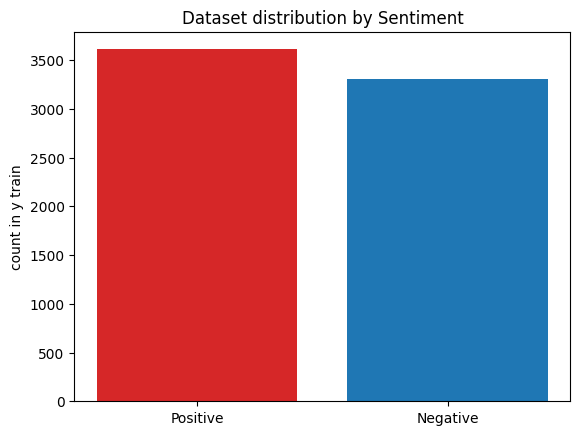

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

balance_train = ['Positive', 'Negative']
counts = [3610, 3310]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(balance_train, counts, color=bar_colors)

ax.set_ylabel('count in y train')
ax.set_title('Dataset distribution by Sentiment')

plt.show()

As we can see, the classes are mostly balanced, so we do not neet to consider using some kind of resampling.

Text(0.5, 1.0, 'Review Length Distribution in X_train')

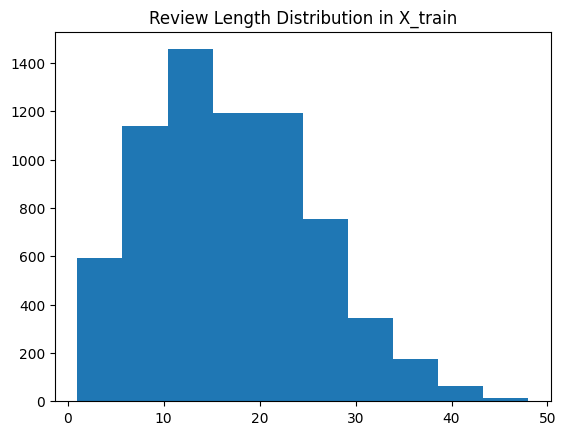

In [ ]:
# review lengths
import matplotlib.pyplot as plt

review_length = X_train.apply(lambda x: len(x.split()))
plt.hist(review_length)
plt.title("Review Length Distribution in X_train")

As shown in this graph, we can see that the review length of X_train varies, with longest review reaching 50 words. Therefore, as we proceed to step two, before buildiing deep learning models, we could consider padding the review into same length.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


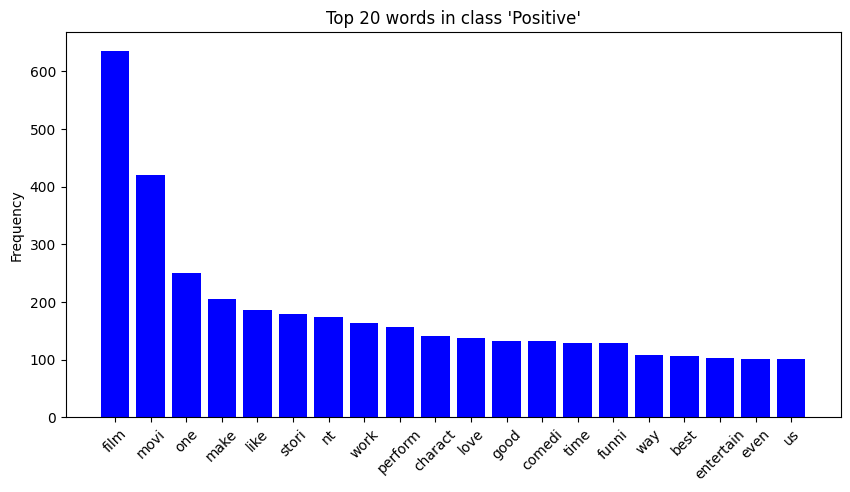

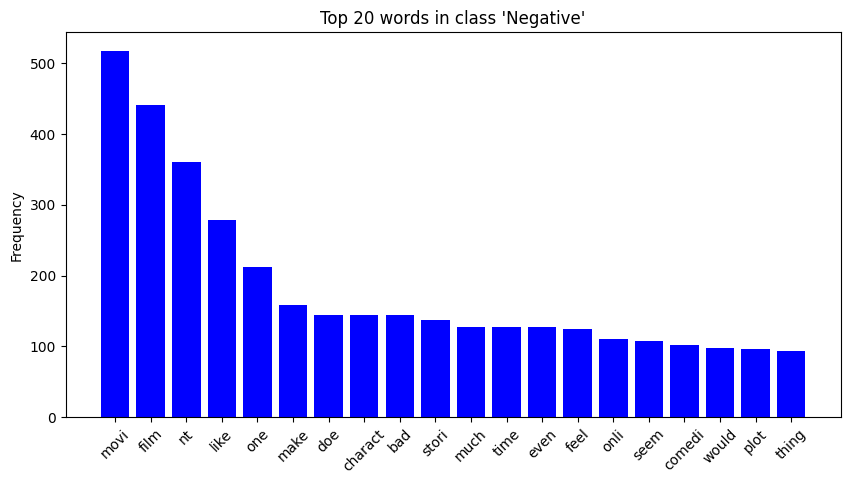

In [ ]:
# word frequency
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and create a freq dict per class
word_freq = {}
classes = y_train_labels.unique()

for class_name in classes:
    text_data = X_train[y_train_labels == class_name]
    all_words = []
    for text in text_data:
        # Tokenize and stop words removal
        tokens = [word for word in word_tokenize(text) if word.lower() not in stop_words and word.isalpha()]
        all_words.extend(tokens)

    word_freq[class_name] = Counter(all_words)

# top N words per class
top_n = 20
for class_name, counter in word_freq.items():
    most_common = counter.most_common(top_n)
    words = [word for word, freq in most_common]
    frequencies = [freq for word, freq in most_common]


    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies, color='blue')
    plt.title(f"Top {top_n} words in class '{class_name}'")
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

As shown in the bar plots above, word frequency in positive and negative classed corpuses are different to a certain extent.
Both contain theme words like "movie", "film", "story" and "character". Both contain common verbs and prepositions and adverbs like "feel", "like", "make" and "even".
Positive corpuses contain specific words like "funny", "best", etc.
Negative corpuses contain specific words like "bad".


---

Moreover, these plots again proves that setting max_df to 200 is reasonable, because we can exclude words that are common in the context and not helpful to classification like "movie" and "film" which has a max count over 200 in both target classes. As shown in the plots, words below 200 act as a more stronger indicator in target classes like "best", "funny" in positive, "only" in negative.

If you think lemmatization, stemming and other text preprocessing should be performed, code here. You can also go back and include it in the preprocessing function if you want.

You are also free to include any extra features that you extract from the text to aid in modeling (Optional)

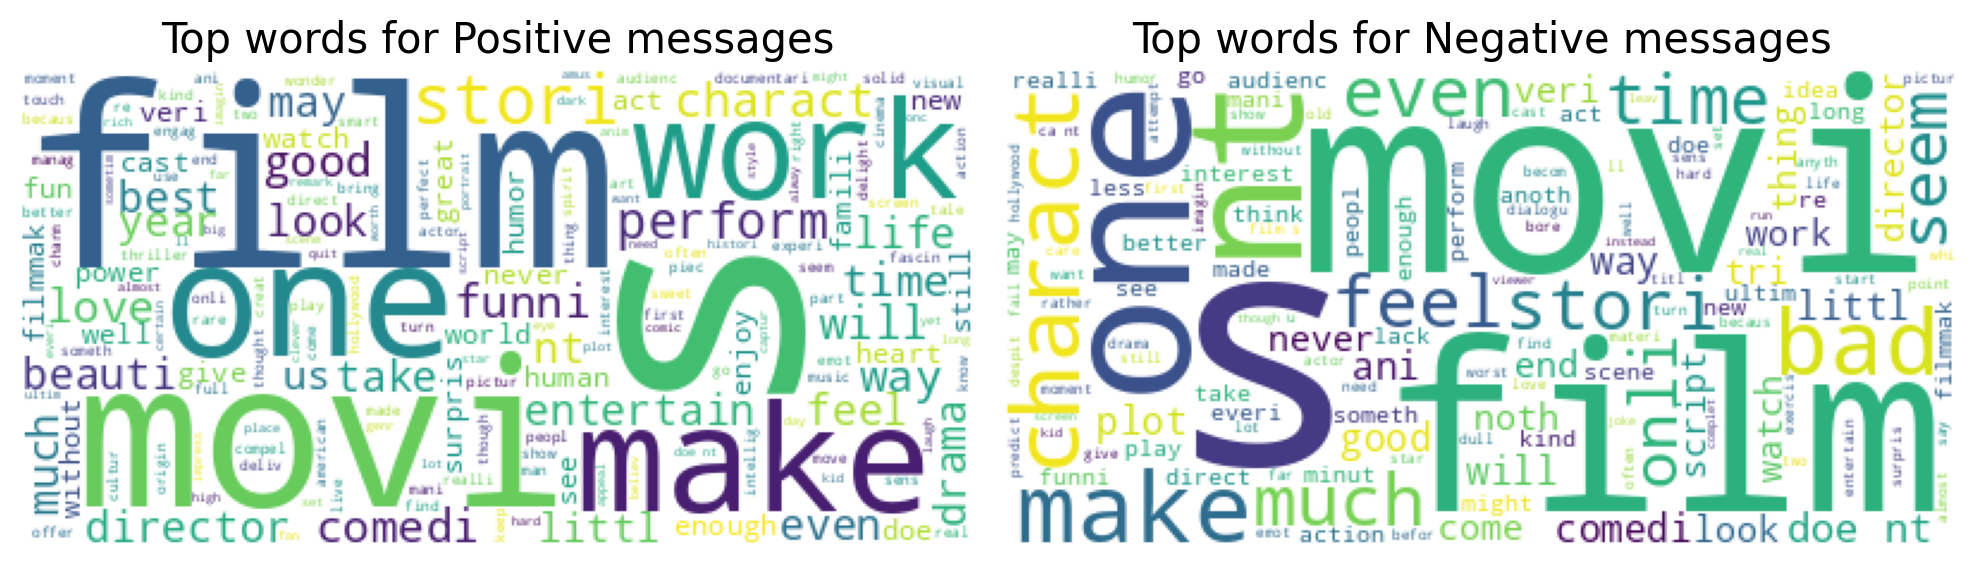

In [ ]:
# wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), dpi=200)

for idx, class_name in enumerate(classes):
  wc = WordCloud(
      background_color='white',
      max_words=200
  )

  wc.generate(' '.join(text for text in X_train[y_train_labels == class_name]))

  axes[idx].imshow(wc)
  axes[idx].set_title('Top words for ' + class_name + ' messages', fontdict={'size': 15})
  axes[idx].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# additional preprocessing [2 Pts]
# pipelined and already included before preprocessor: transform to lowercase, remove special character, stemming

##3. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Code Random Forest model [1 Pts]
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_train_labels)

model = RandomForestClassifier()
model.fit(preprocessor(X_train), y_encoded)

RandomForestClassifier()

#### Save preprocessor function to local "preprocessor.zip" file

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count= preprocessor(X_test).shape[1] # Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))] # Get correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this Movie Review Playground

set_credentials(apiurl=apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1:

#-- Generate predicted values (a list of predicted labels "positive" or "negative") (Model 1)
prediction_labels = encoder.inverse_transform(model.predict(preprocessor(X_test)))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = "model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 489

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## 5. Repeat submission process to improve place on leaderboard


In [ ]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

# Re fit a better RF model [1 Pts]
model2 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 2)
model2.fit(preprocessor(X_train), y_encoded)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# complete as before

onnx_model = model_to_onnx(model2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2:

#-- Generate predicted values (a list of predicted labels "positive" or "negative") (Model 2)
prediction_labels = encoder.inverse_transform(model2.predict(preprocessor(X_test)))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = "model2.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 490

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [ ]:
# Compare two or more models
data=mycompetition.compare_models([485, 486], verbose=1)
mycompetition.stylize_compare(data)

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.model_selection import GridSearchCV
import numpy as np

# Do grid search over atleast 2 hyperparams of RF and get your best model [1 Pts]

# extract and print best score and parameters
from sklearn.model_selection import GridSearchCV


params = {'n_estimators': [100, 200, 300],
          "min_samples_split": [2, 4],
          "min_samples_leaf": [1, 2],
          "max_depth": [5, 8, 10]
          }

model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)

grid_search.fit(preprocessor(X_train), y_encoded)
best_params = grid_search.best_estimator_
best_params

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.6345375722543352


In [ ]:
best_model = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
best_model.fit(preprocessor(X_train), y_encoded)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
train_score = best_model.score(preprocessor(X_train), y_encoded) # Fit score, 0-1 scale.
print("Model training score is {}".format(round(train_score, 6)))

prediction_labels = best_model.predict(preprocessor(X_train))
f1_metric = f1_score(y_encoded, list(prediction_labels))
print("Model f1-score is {}".format(round(f1_metric, 6)))

Model training score is 0.677023
Model f1-score is 0.758613


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx


# complete

onnx_model = model_to_onnx(best_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("best_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3:

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels = encoder.inverse_transform(best_model.predict(preprocessor(X_test)))

# Submit Model 3 to Competition Leaderboard
mycompetition.submit_model(model = "best_model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)


Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 491

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [ ]:
encoder

LabelEncoder()

In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([486,487], verbose=1)
mycompetition.stylize_compare(data)

In [ ]:
# Here are several classic ML architectures you can choose from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from aimodelshare.aimsonnx import model_to_onnx



## Experiment with at least 3 different models from above imports. [2 Pts]
X_train_preprocessed = preprocessor(X_train)
X_test_preprocessed = preprocessor(X_test)

modelSVC = SVC()
modelSVC.fit(X_train_preprocessed, y_encoded)
feature_count= X_test_preprocessed.shape[1] # Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))] # Get correct number of preprocessed features

onnx_model = model_to_onnx(modelSVC, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("modelSVC.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels = encoder.inverse_transform(modelSVC.predict(X_test_preprocessed))


# Submit model to Competition Leaderboard
mycompetition.submit_model(model = "modelSVC.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)


SVC()

In [ ]:
modelBC = BaggingClassifier()
modelBC.fit(X_train_preprocessed, y_encoded)
feature_count= X_test_preprocessed.shape[1] # Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))] # Get correct number of preprocessed features

onnx_model = model_to_onnx(modelBC, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("modelBC.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels = encoder.inverse_transform(modelBC.predict(X_test_preprocessed))


# Submit model to Competition Leaderboard
mycompetition.submit_model(model = "modelBC.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

BaggingClassifier()

In [ ]:
modelGBC = GradientBoostingClassifier()
modelGBC.fit(X_train_preprocessed, y_encoded)
feature_count= X_test_preprocessed.shape[1] # Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))] # Get correct number of preprocessed features

onnx_model = model_to_onnx(modelGBC, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("modelGBC.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels = encoder.inverse_transform(modelGBC.predict(X_test_preprocessed))


# Submit model to Competition Leaderboard
mycompetition.submit_model(model = "modelGBC.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

GradientBoostingClassifier()

In [ ]:
data=mycompetition.compare_models([492, 493, 494], verbose=1)
mycompetition.stylize_compare(data)

Tabularize your results and compare them here:

In [ ]:
data = mycompetition.get_leaderboard()
data_stylized = mycompetition.stylize_leaderboard(data)

In [ ]:
test_metric = data[data['version'].isin([489, 490, 491, 492, 493, 494])][['model_type', 'accuracy', 'f1_score', 'precision', 'recall']]
test_metric.iloc[1,0] = 'RFClassifier1'
test_metric.iloc[2,0] = 'RFClassifier2'
test_metric.iloc[4,0] = 'RFClassifier GridCV'
test_metric

In [ ]:
def train_data(models, X_train_preprocessed, y_encoded):
  train_df = pd.DataFrame()
  train_df['model_type'] = ["RandomForestClassifier", 'RandomForestClassifier', 'RandomForestClassifier', 'SVC', 'BaggingClassifier', 'GradientBoostingClassifier']
  f1_metrics = []
  precision_score_metrics = []
  accuracy_score_metrics = []
  recall_score_metrics = []
  for model in models:
    prediction_labels = model.predict(X_train_preprocessed)
    f1_metric = f1_score(y_encoded, list(prediction_labels))
    precision_score_metric = precision_score(y_encoded, list(prediction_labels))
    accuracy_score_metric = accuracy_score(y_encoded, list(prediction_labels))
    recall_score_metric = recall_score(y_encoded, list(prediction_labels))
    f1_metrics.append(f1_metric)
    precision_score_metrics.append(precision_score_metric)
    accuracy_score_metrics.append(accuracy_score_metric)
    recall_score_metrics.append(recall_score_metric)
  train_df['accuracy_train'] = accuracy_score_metrics
  train_df['f1_train'] = f1_metrics
  train_df['precision_train'] = precision_score_metrics
  train_df['recall_train'] = recall_score_metrics
  return train_df

models = [model, model2, best_model, modelSVC, modelBC, modelGBC]

train_metric = train_data(models, X_train_preprocessed,y_encoded)
train_metric.iloc[0,0] = 'RFClassifier1'
train_metric.iloc[1,0] = 'RFClassifier2'
train_metric.iloc[2,0] = 'RFClassifier GridCV'
train_metric

In [ ]:
tabularized_model_results = pd.merge(test_metric, train_metric, on="model_type")
tabularized_model_results


model_type  accuracy  f1_score  precision    recall  \
0                         SVC  0.765093  0.765011   0.765506  0.765115   
1               RFClassifier1  0.739846  0.739835   0.739903  0.739854   
2               RFClassifier2  0.726674  0.726653   0.726763  0.726684   
3           BaggingClassifier  0.717892  0.717891   0.717902  0.717896   
4         RFClassifier GridCV  0.621295  0.581788   0.695936  0.621633   
5  GradientBoostingClassifier  0.635565  0.611440   0.680987  0.635840   

   accuracy_train  f1_train  precision_train  recall_train  
0        0.951156  0.952885         0.959035      0.946814  
1        0.984827  0.985329         0.994080      0.976731  
2        0.891040  0.896684         0.887202      0.906371  
3        0.967919  0.968794         0.983447      0.954571  
4        0.677023  0.758613         0.621703      0.972853  
5        0.718353  0.778648         0.659865      0.949584

Discuss which models performed better and why

In [ ]:
# Discussion [1 Pts]


the SVC has the highest test accuracy, F1 score, precision, and recall. This indicates it is the most consistent across all metrics for the test set, suggesting it might be the best generalizer among the models evaluated for unseen data.

However, for RFClassifier1, despite having slightly lower metrics in the test set, has exceptionally high training metrics, this indicate a risk of overfitting since its performance is much better on the training set than on the test set. This could be due to RF's tendancy of overfitting, since for RFC1 we used defualt hyperparams.

The BaggingClassifier and RFClassifier2 performs moderate but not as good as the SVC or RFClassifier1.

The RFClassifier GridCV and GradientBoostingClassifier have the lowest performance metrics on the test set.

For RFClassifier GridCV, the drop in performance in trainingset compare to RFC1 is substantial, this might be becuase by manuelly setting combinations of hyperparams we want the model to train on, we intentionally set the max_depth can not be greater then 10 to try to solve its overfitting problem.